In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing the dataset;
Company = pd.read_excel('CompData.xlsx')

#Glimpse of Data
Company.head()

,Co_Code,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,16974,Hind.Cables,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,...,0.310901,0.034913,0,0.028801,0.620927,0.026930,0.565744,1,0.015338,0
1,21214,Tata Tele. Mah.,9.380000e+09,4.230000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021902,...,0.314572,0.041653,0,0.006191,0.622513,0.026297,0.560741,1,0.029445,1
2,14852,ABG Shipyard,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.299851,0.172554,0.022186,...,0.314777,0.033560,0,0.001095,0.623749,0.027276,0.566744,1,0.041718,0
3,2439,GTL,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.174738,0.027638,...,0.316974,0.016527,0,0.003749,0.622963,0.026988,0.565950,1,0.026956,0
4,23505,Bharati Defence,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.176546,0.022072,...,0.317729,0.034497,0,0.006595,0.624419,0.027498,0.567177,1,0.019900,0


In [3]:
#Fixing messy column names (containing spaces) for ease of use;
# Remove underscores from the start of column names
Company.columns = Company.columns.str.lstrip('_')

# Remove underscores from the end of column names
Company.columns = Company.columns.str.rstrip('_')

In [4]:
Company.head()

,Co_Code,Co_Name,Operating_Expense_Rate,Research_and_development_expense_rate,Cash_flow_rate,Interest_bearing_debt_interest_rate,Tax_rate_A,Cash_Flow_Per_Share,Per_Share_Net_profit_before_tax_Yuan,Realized_Sales_Gross_Profit_Growth_Rate,...,Cash_Flow_to_Equity,Current_Liability_to_Current_Assets,Liability_Assets_Flag,Total_assets_to_GNP_price,No_credit_Interval,Degree_of_Financial_Leverage_DFL,Interest_Coverage_Ratio_Interest_expense_to_EBIT,Net_Income_Flag,Equity_to_Liability,Default
0,16974,Hind.Cables,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,...,0.310901,0.034913,0,0.028801,0.620927,0.026930,0.565744,1,0.015338,0
1,21214,Tata Tele. Mah.,9.380000e+09,4.230000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021902,...,0.314572,0.041653,0,0.006191,0.622513,0.026297,0.560741,1,0.029445,1
2,14852,ABG Shipyard,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.299851,0.172554,0.022186,...,0.314777,0.033560,0,0.001095,0.623749,0.027276,0.566744,1,0.041718,0
3,2439,GTL,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.174738,0.027638,...,0.316974,0.016527,0,0.003749,0.622963,0.026988,0.565950,1,0.026956,0
4,23505,Bharati Defence,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.176546,0.022072,...,0.317729,0.034497,0,0.006595,0.624419,0.027498,0.567177,1,0.019900,0


In [5]:
#check the number of rows (observations) and the number of columns (variables);
print('The number of rows (observations) is',Company.shape[0],'\n''The number of columns (variables) is',Company.shape[1])

The number of rows (observations) is 2058 
The number of columns (variables) is 58


In [6]:
#Checking datatype of all columns;
Company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 58 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Co_Code                                           2058 non-null   int64  
 1   Co_Name                                           2058 non-null   object 
 2   Operating_Expense_Rate                            2058 non-null   float64
 3   Research_and_development_expense_rate             2058 non-null   float64
 4   Cash_flow_rate                                    2058 non-null   float64
 5   Interest_bearing_debt_interest_rate               2058 non-null   float64
 6   Tax_rate_A                                        2058 non-null   float64
 7   Cash_Flow_Per_Share                               1891 non-null   float64
 8   Per_Share_Net_profit_before_tax_Yuan              2058 non-null   float64
 9   Realized_Sales_Gros

In [7]:
#check the basic measures of descriptive statistics for the continuous variables;
Company.describe()

,Co_Code,Operating_Expense_Rate,Research_and_development_expense_rate,Cash_flow_rate,Interest_bearing_debt_interest_rate,Tax_rate_A,Cash_Flow_Per_Share,Per_Share_Net_profit_before_tax_Yuan,Realized_Sales_Gross_Profit_Growth_Rate,Operating_Profit_Growth_Rate,...,Cash_Flow_to_Equity,Current_Liability_to_Current_Assets,Liability_Assets_Flag,Total_assets_to_GNP_price,No_credit_Interval,Degree_of_Financial_Leverage_DFL,Interest_Coverage_Ratio_Interest_expense_to_EBIT,Net_Income_Flag,Equity_to_Liability,Default
count,2058.000000,2.058000e+03,2.058000e+03,2058.000000,2.058000e+03,2058.000000,1891.000000,2058.000000,2058.000000,2058.000000,...,2058.000000,2044.000000,2058.000000,2.058000e+03,2058.000000,2058.000000,2058.000000,2058.0,2058.000000,2058.000000
mean,17572.113217,2.052389e+09,1.208634e+09,0.465243,1.113022e+07,0.114777,0.319986,0.176967,0.022761,0.848108,...,0.314629,0.039352,0.003401,2.779397e+07,0.623686,0.027852,0.565435,1.0,0.042529,0.106900
std,21892.886518,3.252624e+09,2.144568e+09,0.022663,9.042595e+07,0.152446,0.015300,0.030157,0.021701,0.004589,...,0.012780,0.047978,0.058236,4.717714e+08,0.011631,0.013839,0.011535,0.0,0.059525,0.309061
min,4.000000,1.000260e-04,0.000000e+00,0.000000,0.000000e+00,0.000000,0.169449,0.000000,0.004282,0.736430,...,0.000000,0.000000,0.000000,0.000000e+00,0.408682,0.012845,0.172065,1.0,0.003946,0.000000
25%,3674.000000,1.578727e-04,0.000000e+00,0.460099,2.760280e-04,0.000000,0.314989,0.166604,0.022058,0.847974,...,0.312783,0.021775,0.000000,9.124052e-04,0.623327,0.026776,0.565158,1.0,0.020408,0.000000
50%,6240.000000,3.330330e-04,1.994130e-04,0.463445,4.540450e-04,0.037099,0.320648,0.175642,0.022100,0.848039,...,0.314642,0.032652,0.000000,2.479550e-03,0.623750,0.026815,0.565315,1.0,0.028460,0.000000
75%,24280.750000,4.110000e+09,1.550000e+09,0.468069,6.630660e-04,0.216191,0.325918,0.185885,0.022152,0.848115,...,0.316546,0.043947,0.000000,7.004449e-03,0.624045,0.027029,0.566232,1.0,0.043433,0.000000
max,72493.000000,9.980000e+09,9.980000e+09,1.000000,9.900000e+08,0.999696,0.462227,0.792348,1.000000,1.000000,...,0.569231,1.000000,1.000000,9.820000e+09,0.956387,0.464388,0.666761,1.0,1.000000,1.000000


In [8]:
#variable 'default' look like;
Company['Default'].value_counts()

0    1838
1     220
Name: Default, dtype: int64

In [9]:
#Checking proportion of default;
220/(1838+220)

0.10689990281827016

In [10]:
#Checking summary statistics of default variable;
Company['Default'].describe()

count    2058.000000
mean        0.106900
std         0.309061
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Default, dtype: float64

In [11]:
##Missing Value:-

In [12]:
#Check if 'Net_Income_Flag' has 100% similarity;
Company['Net_Income_Flag'].value_counts()

1    2058
Name: Net_Income_Flag, dtype: int64

In [13]:
#Dropping 'Net_Income_Flag' as its completely 100% similarity;
Company = Company.drop(columns=['Net_Income_Flag'])
Company.head()


,Co_Code,Co_Name,Operating_Expense_Rate,Research_and_development_expense_rate,Cash_flow_rate,Interest_bearing_debt_interest_rate,Tax_rate_A,Cash_Flow_Per_Share,Per_Share_Net_profit_before_tax_Yuan,Realized_Sales_Gross_Profit_Growth_Rate,...,CFO_to_Assets,Cash_Flow_to_Equity,Current_Liability_to_Current_Assets,Liability_Assets_Flag,Total_assets_to_GNP_price,No_credit_Interval,Degree_of_Financial_Leverage_DFL,Interest_Coverage_Ratio_Interest_expense_to_EBIT,Equity_to_Liability,Default
0,16974,Hind.Cables,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,...,0.576869,0.310901,0.034913,0,0.028801,0.620927,0.026930,0.565744,0.015338,0
1,21214,Tata Tele. Mah.,9.380000e+09,4.230000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021902,...,0.551523,0.314572,0.041653,0,0.006191,0.622513,0.026297,0.560741,0.029445,1
2,14852,ABG Shipyard,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.299851,0.172554,0.022186,...,0.463045,0.314777,0.033560,0,0.001095,0.623749,0.027276,0.566744,0.041718,0
3,2439,GTL,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.174738,0.027638,...,0.577212,0.316974,0.016527,0,0.003749,0.622963,0.026988,0.565950,0.026956,0
4,23505,Bharati Defence,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.176546,0.022072,...,0.594038,0.317729,0.034497,0,0.006595,0.624419,0.027498,0.567177,0.019900,0


In [14]:
# check for missing values in the dataset;
Company.isnull().sum()

Co_Code                                               0
Co_Name                                               0
Operating_Expense_Rate                                0
Research_and_development_expense_rate                 0
Cash_flow_rate                                        0
Interest_bearing_debt_interest_rate                   0
Tax_rate_A                                            0
Cash_Flow_Per_Share                                 167
Per_Share_Net_profit_before_tax_Yuan                  0
Realized_Sales_Gross_Profit_Growth_Rate               0
Operating_Profit_Growth_Rate                          0
Continuous_Net_Profit_Growth_Rate                     0
Total_Asset_Growth_Rate                               0
Net_Value_Growth_Rate                                 0
Total_Asset_Return_Growth_Rate_Ratio                  0
Cash_Reinvestment_perc                                0
Current_Ratio                                         0
Quick_Ratio                                     

In [15]:
#Columns with missing values;
print(np.where(Company.isnull().sum()>0))

(array([ 7, 19, 31, 49], dtype=int64),)


In [16]:
Company.iloc[:,49].isnull().sum()

14

In [17]:
#Missing Value Treatment;

In [18]:
#Treat missing values with median (replacement with median eliminates impact of outliers in the treatment);
Company = Company.fillna(Company.median())

In [19]:
#Check for missing values in the dataset;
Company.isnull().sum()

Co_Code                                             0
Co_Name                                             0
Operating_Expense_Rate                              0
Research_and_development_expense_rate               0
Cash_flow_rate                                      0
Interest_bearing_debt_interest_rate                 0
Tax_rate_A                                          0
Cash_Flow_Per_Share                                 0
Per_Share_Net_profit_before_tax_Yuan                0
Realized_Sales_Gross_Profit_Growth_Rate             0
Operating_Profit_Growth_Rate                        0
Continuous_Net_Profit_Growth_Rate                   0
Total_Asset_Growth_Rate                             0
Net_Value_Growth_Rate                               0
Total_Asset_Return_Growth_Rate_Ratio                0
Cash_Reinvestment_perc                              0
Current_Ratio                                       0
Quick_Ratio                                         0
Interest_Expense_Ratio      

In [20]:
#Outlier detection & Treatment;

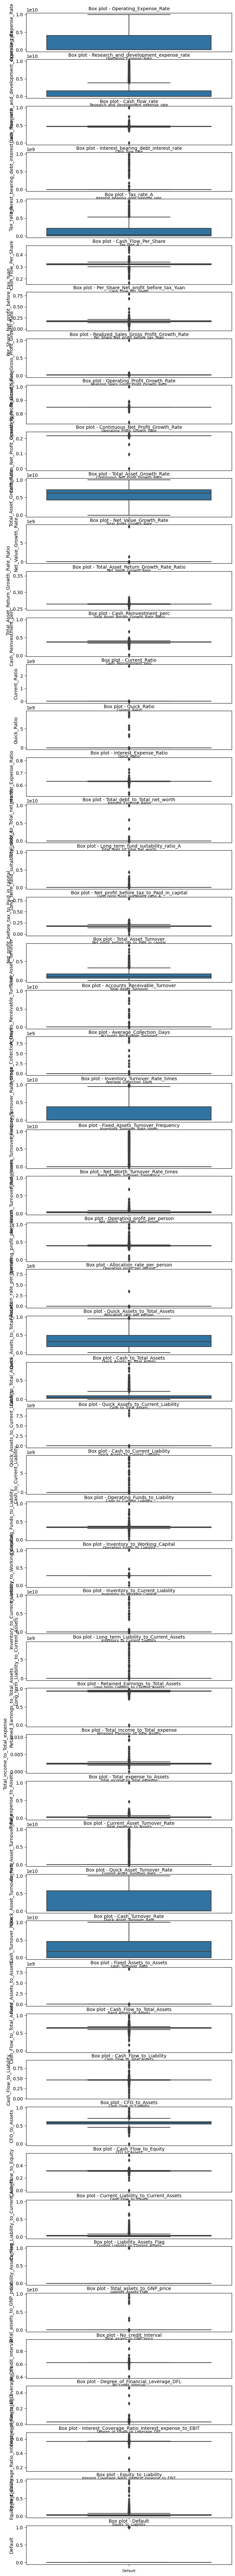

In [21]:
# Checking Outliers in dataset;
col_names = list(Company.columns)
col_names.remove('Co_Code')
col_names.remove('Co_Name')
fig, ax = plt.subplots(len(col_names), figsize=(8,100))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=Company[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [22]:
#Outlier Treatment, use capping method to treat them;
def check_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([.25,.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [23]:
#check outliers(Lower and Upper whiskers) in these variables;

In [24]:
check_outlier(Company['Operating_Expense_Rate'])

(-6164999999.999605, 10274999999.999763)

In [25]:
check_outlier(Company['Total_Asset_Growth_Rate'])

(-42500000.0, 11577500000.0)

In [26]:
check_outlier(Company['Quick_Asset_Turnover_Rate'])

(-8684999999.999622, 14474999999.999773)

In [27]:
#Capping the outliers;

In [28]:
def treat_outlier(column):
    # Convert column to numeric, handling non-numeric values by coercing them to NaN
    column_numeric = pd.to_numeric(column, errors='coerce')

    # taking 5, 25, 75 percentile of column
    q5 = np.percentile(column_numeric, 5)
    q25 = np.percentile(column_numeric, 25)
    q75 = np.percentile(column_numeric, 75)
    upper_threshold = np.percentile(column_numeric, 95)

    # calculating IQR range
    IQR = q75 - q25
    # calculating minimum threshold
    lower_bound = q25 - (1.5 * IQR)
    upper_bound = q75 + (1.5 * IQR)

    # capping outliers
    return column_numeric.apply(lambda y: upper_threshold if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)

# Assuming 'Company' is your DataFrame
for column in Company.columns:
    Company[column] = treat_outlier(Company[column])


In [29]:
for i in Company:
    Company[i]=treat_outlier(Company[i])

In [30]:
Company.shape

(2058, 57)

In [31]:

# Assuming 'company' is your DataFrame containing the relevant data
# Assuming 'significant_vars' is a list of variable names that were significant in your model building

# Filter the DataFrame to include only significant variables
Company_significant = ['Operating_Expense_Rate', 'Cash_flow_rate', 'Total_Asset_Growth_Rate', 'Interest_Expense_Ratio', 'Current_Ratio', 'Default']


# Univariate Analysis
for column in Company_significant.columns:
    # For numerical variables
    if Company_significant[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(8, 6))
        sns.histplot(Company_significant[column], kde=True)
        plt.title(f'Univariate Analysis: {column}')
        plt.show()
    # For categorical variables
    elif Company_significant[column].dtype == 'object':
        plt.figure(figsize=(8, 6))
        sns.countplot(data=Company_significant, x=column)
        plt.title(f'Univariate Analysis: {column}')
        plt.show()

AttributeError: 'list' object has no attribute 'columns'

In [32]:


# Assuming 'company' is your DataFrame containing the relevant data
# Assuming 'significant_vars' is a list of variable names that were significant in your model building

# Filter the DataFrame to include only significant variables
Company_significant = ['Operating_Expense_Rate', 'Cash_flow_rate', 'Total_Asset_Growth_Rate', 'Interest_Expense_Ratio', 'Current_Ratio', 'Default']


# Univariate Analysis
for column in Company_significant.columns:
    # For numerical variables
    if Company_significant[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(8, 6))
        sns.histplot(Company_significant[column], kde=True)
        plt.title(f'Univariate Analysis: {column}')
        plt.show()
    # For categorical variables
    elif Company_significant[column].dtype == 'object':
        plt.figure(figsize=(8, 6))
        sns.countplot(data=Company_significant, x=column)
        plt.title(f'Univariate Analysis: {column}')
        plt.show()

# Bivariate Analysis
for column1 in Company_significant.columns:
    for column2 in Company_significant.columns:
        if column1 != column2:
            # For numerical vs numerical variables
            if Company_significant[column1].dtype in ['int64', 'float64'] and Company_significant[column2].dtype in ['int64', 'float64']:
                plt.figure(figsize=(8, 6))
                sns.scatterplot(data=Company_significant, x=column1, y=column2)
                plt.title(f'Bivariate Analysis: {column1} vs {column2}')
                plt.show()
            # For numerical vs categorical variables or vice versa
            elif (Company_significant[column1].dtype in ['int64', 'float64'] and Company_significant[column2].dtype == 'object') or (Company_significant[column1].dtype == 'object' and Company_significant[column2].dtype in ['int64', 'float64']):
                plt.figure(figsize=(10, 8))
                sns.boxplot(data=Company_significant, x=column2, y=column1)
                plt.title(f'Bivariate Analysis: {column1} vs {column2}')
                plt.show()
            # For categorical vs categorical variables
            elif Company_significant[column1].dtype == 'object' and Company_significant[column2].dtype == 'object':
                plt.figure(figsize=(10, 8))
                sns.countplot(data=Company_significant, x=column1, hue=column2)
                plt.title(f'Bivariate Analysis: {column1} vs {column2}')
                plt.show()


AttributeError: 'list' object has no attribute 'columns'

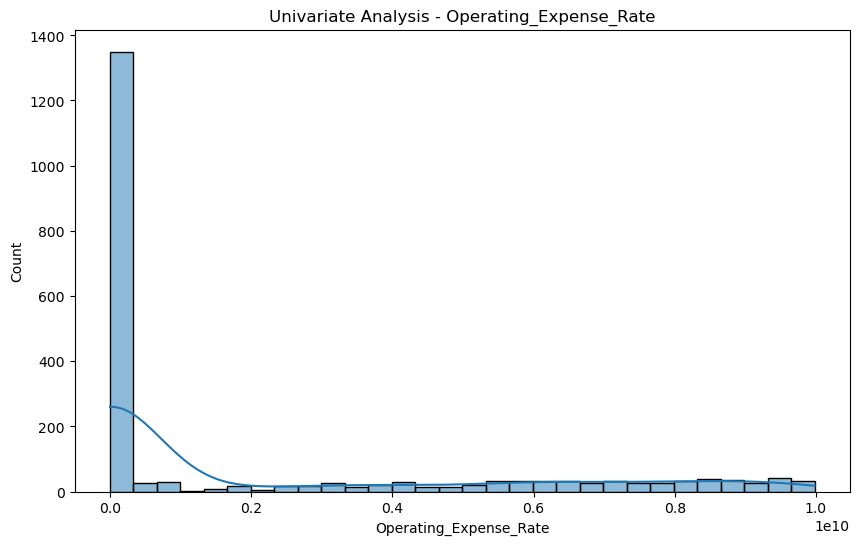

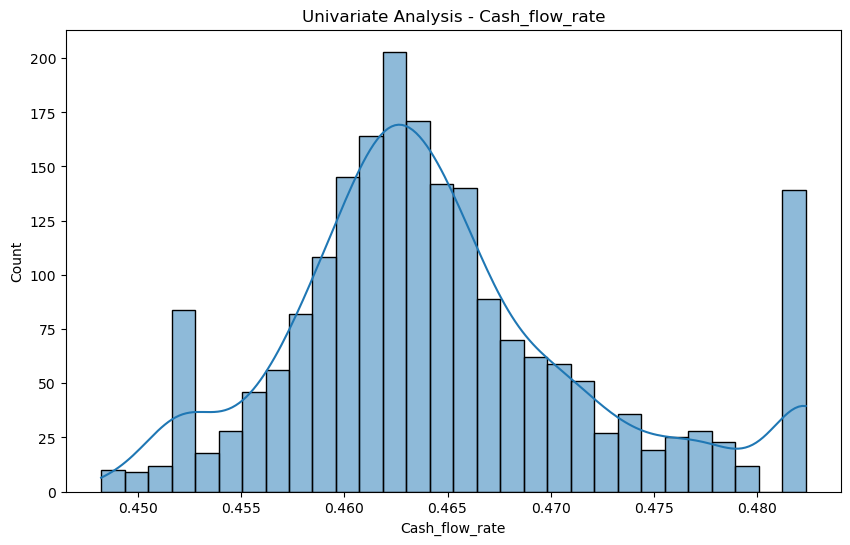

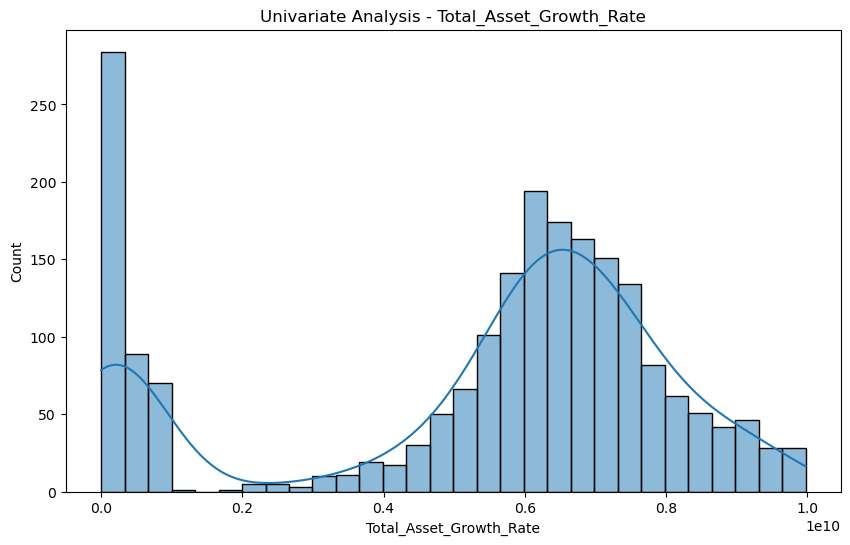

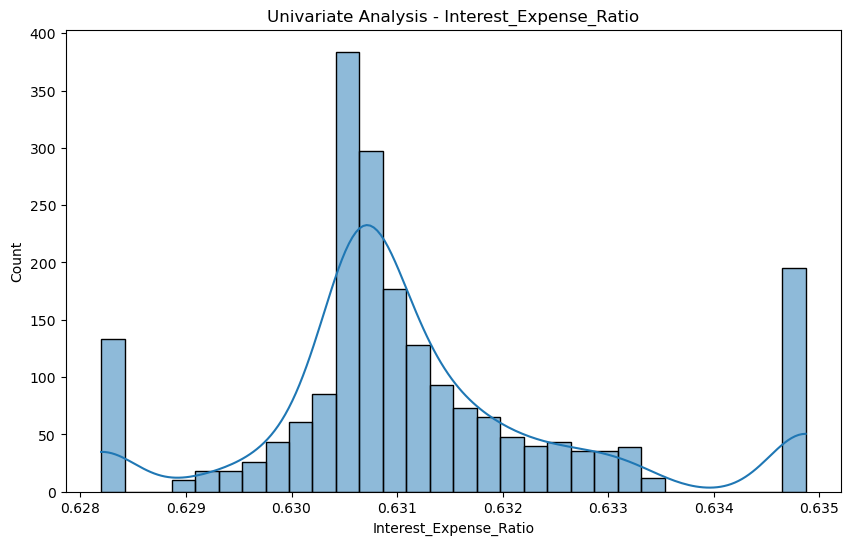

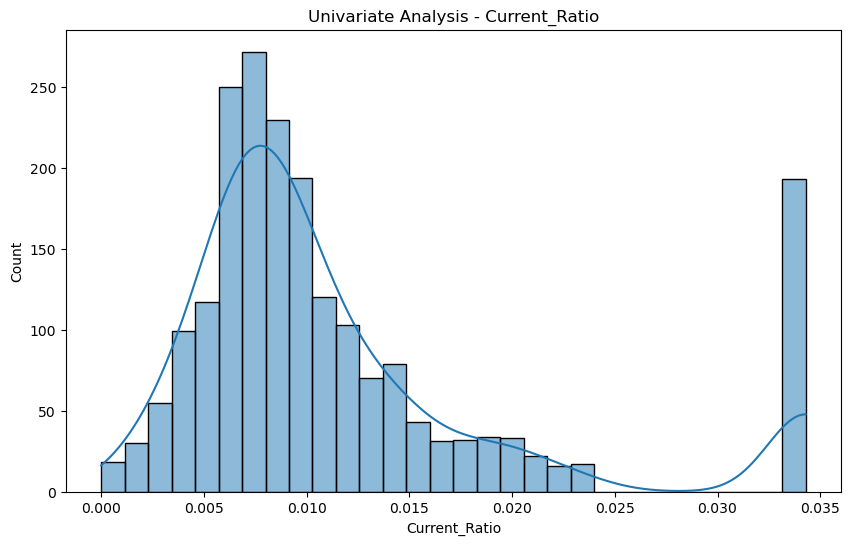

In [33]:
# Selected variables for analysis (replace with your actual significant variables)
selected_variables = ['Operating_Expense_Rate', 'Cash_flow_rate', 'Total_Asset_Growth_Rate', 'Interest_Expense_Ratio', 'Current_Ratio', 'Default']

# Univariate Analysis
for column in selected_variables[:-1]:  # Exclude 'Default' for univariate analysis
    plt.figure(figsize=(10, 6))
    sns.histplot(data=Company, x=column, kde=True, bins=30)
    plt.title(f'Univariate Analysis - {column}')
    plt.show()



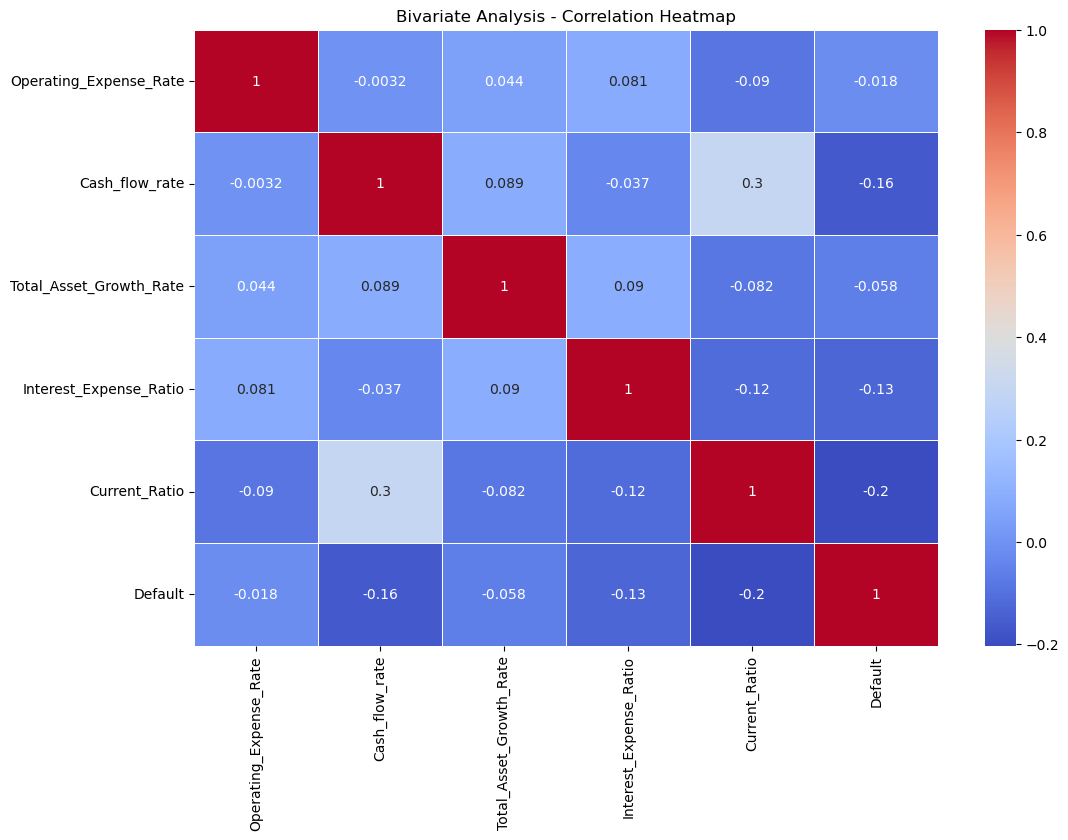

In [34]:
# Bivariate Analysis
plt.figure(figsize=(12, 8))
sns.heatmap(Company[selected_variables].corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Bivariate Analysis - Correlation Heatmap')
plt.show()
